<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/regressao_linear_2023/notebooks/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/MyDrive')
!unzip -n /content/MyDrive/MyDrive/projeto-inicial.zip

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).
Archive:  /content/MyDrive/MyDrive/projeto-inicial.zip


# Lendo o dataset em Pandas


In [ ]:
dados = pd.read_csv('/content/data-science/reg-linear-II/Dados/dataset.csv', sep=';')

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [ ]:
dados.shape

(5000, 4)

# Análises gráficas

## Setando a paleta dos gráficos

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Setando os gráficos

<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Reais'>

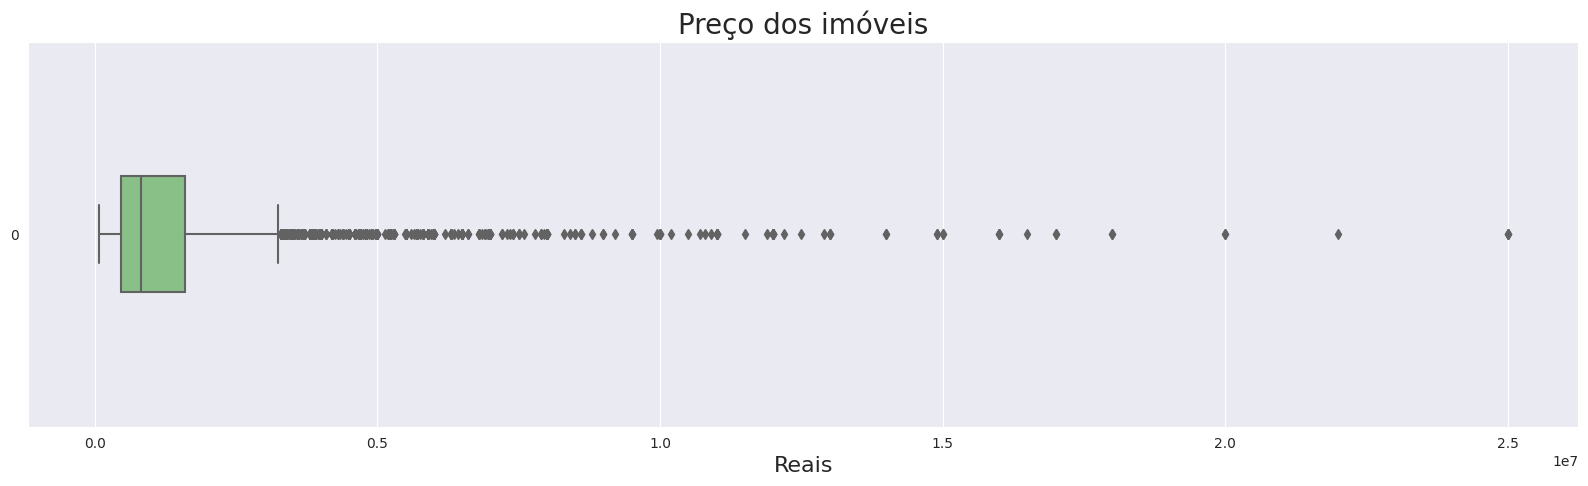

In [ ]:
ax = sns.boxplot(data = dados['Valor'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20,5)
ax.set_title('Preço dos imóveis', fontsize = 20)
ax.set_xlabel('Reais', fontsize = 16)
ax

<ipython-input-76-3cdb88c85502>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: title={'center': 'Distribuição dos valores de imóveis'}, xlabel='Valores', ylabel='Quantidade de imóveis'>

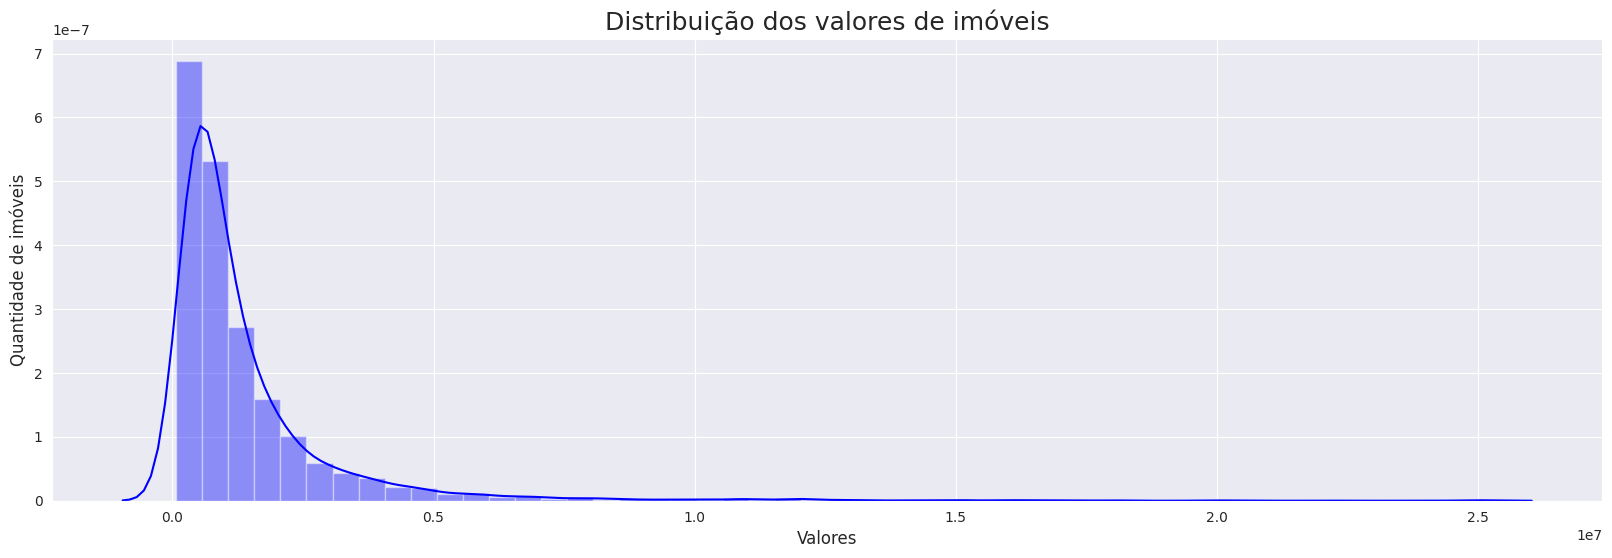

In [ ]:
ax = sns.distplot(dados['Valor'], color = 'b')
ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição dos valores de imóveis', fontsize = 18)
ax.set_xlabel('Valores', fontsize = 12)
ax.set_ylabel('Quantidade de imóveis', fontsize = 12)
ax

Text(0.5, 1.05, 'Dispersão entre as variáveis')

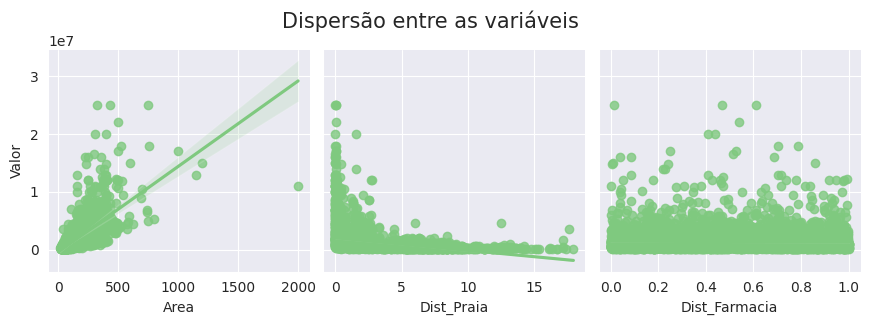

In [ ]:
ax = sns.pairplot(dados, y_vars = 'Valor', x_vars =['Area', 'Dist_Praia', 'Dist_Farmacia'], kind ='reg', height = 3)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 15, y = 1.05)

# Transformando os dados

## Normalizando os dados em escala logaritmica

In [ ]:
np.log(1)

0.0

In [ ]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Análises das variáveis transformadas

<Axes: title={'center': 'Preço dos imóveis'}, xlabel='Reais'>

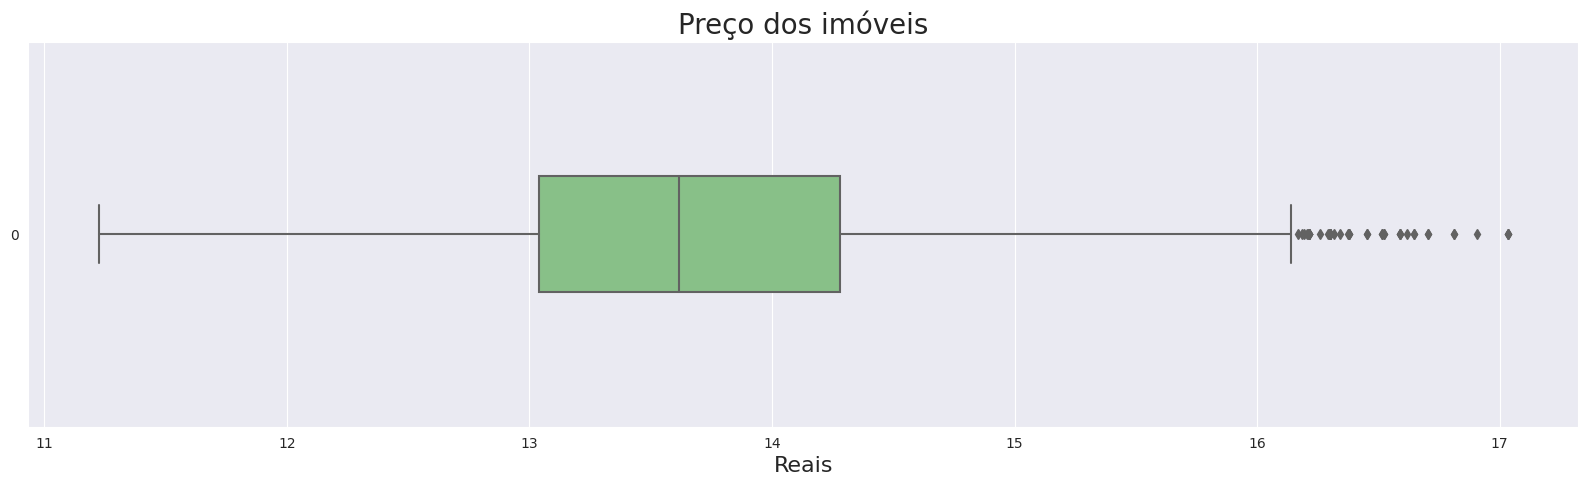

In [ ]:
ax = sns.boxplot(data = dados['log_Valor'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20,5)
ax.set_title('Preço dos imóveis', fontsize = 20)
ax.set_xlabel('Reais', fontsize = 16)
ax

<ipython-input-82-5db9ffd03873>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: title={'center': 'Distribuição dos valores de imóveis'}, xlabel='Valores', ylabel='Quantidade de imóveis'>

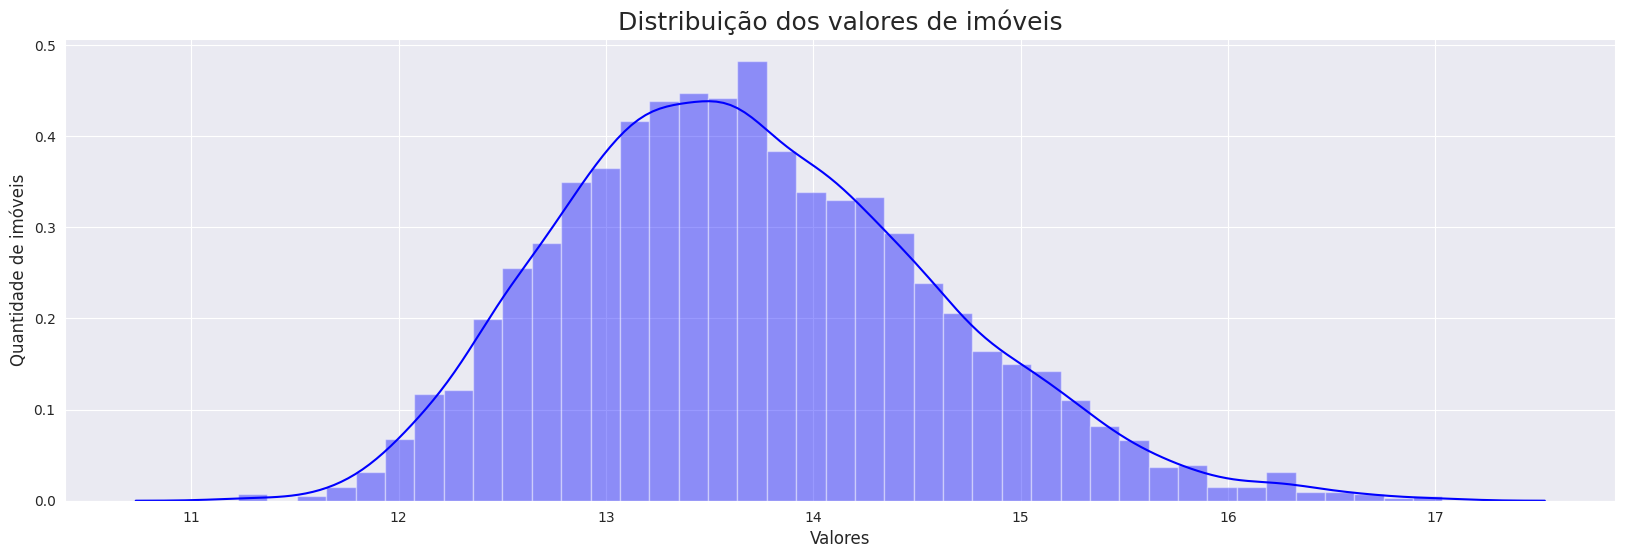

In [ ]:
ax = sns.distplot(dados['log_Valor'], color = 'b')
ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição dos valores de imóveis', fontsize = 18)
ax.set_xlabel('Valores', fontsize = 12)
ax.set_ylabel('Quantidade de imóveis', fontsize = 12)
ax

Text(0.5, 1.05, 'Dispersão entre as variáveis')

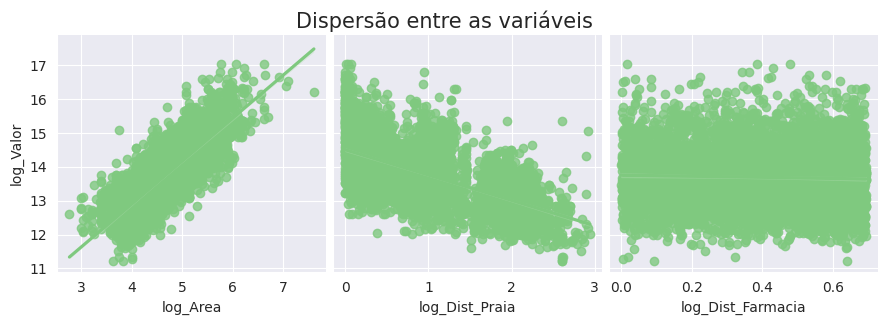

In [ ]:
ax = sns.pairplot(dados, y_vars = 'log_Valor', x_vars =['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind ='reg', height = 3)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 15, y = 1.05)

# Criando os datasets de Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

In [ ]:
y = dados['log_Valor']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

# Criando o modelo de regressão usando a biblioteca 'statsmodels'

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando os resultados dos modelos estatísticos

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:52:00   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

## Modificando o modelo para acertar os parâmetros

In [ ]:
X = dados[['log_Area', 'log_Dist_Praia']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:52:00   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# Estimando o modelo com SKlearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R2 = {}' .format(modelo.score(X_train, y_train)))

R2 = 0.8048773977172844


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R2 = %s' %metrics.r2_score(y_test,y_previsto))

R2 = 0.7904430508603385


# Obtendo previsões pontuais

In [ ]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [ ]:
modelo.predict(entrada)[0]

14.284820061847878

In [ ]:
np.exp(modelo.predict(entrada)[0])

1598889.7847794362

In [ ]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {:.2f}' .format(np.exp(modelo.predict(entrada)[0])))

R$ 2777292.84


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Intepretação dos coeficientes estimados

In [ ]:
modelo.intercept_

9.33491640980033

In [ ]:
np.exp(modelo.intercept_)

11326.681428069862

In [ ]:
modelo.coef_

array([ 1.05807818, -0.49061226])

In [ ]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [ ]:
index = ['Intercepto', 'log Área (m^2)', 'log Distância até a praia (km)']

In [ ]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área (m^2),1.058078
log Distância até a praia (km),-0.490612


# Análises gráficas dos resultados do modelo

In [ ]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [ ]:
y_previsto_train = modelo.predict(X_train)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = y_previsto_train, y = y_train, mode = 'markers'
))
fig.update_layout(title = '<b>Previsão x. Real</b>', xaxis_title = 'log do preço - previsão',
                  yaxis_title = 'log do preço - real', title_font = dict(size = 24),
                  title_x = 0.5)
fig.show(renderer = 'colab')

In [ ]:
residuo = y_train - y_previsto_train

In [ ]:
fig = px.histogram(residuo)
fig.update_layout(title = '<b>Distribuição de frequências dos resíduos</b>', xaxis_title = 'log do Preço',
                  titlefont = dict(size = 20), title_x = 0.45)
fig.update_traces(marker = dict(color = 'red', line = dict(color = 'black', width = 1)))

fig.show(renderer = 'colab')